# Bringing the First Flying-Car Taxi Service to Market

In this project, you will apply the skills they have acquired in this course to strategize how to unveil the first flying-car taxi service in one of the most congested cities in America-- New York City. Your data scientist has passed you a plethora of visualizations, model outputs and aggregated statistics from a dataset containing real taxi drop offs and pick ups in New York City. 

<b>Instructions:</b> create a data-backed product proposal using the outputted statistics to recommend what features the first flying taxi should have to maximize consumer delight and adoption.

Evaluate the data and determine what metrics are valuable for the product goal.Evaluate hypothesis testing results, statistical results, and visualizations and determine whether those results should be used to inform product decisions. 

Develop a product proposal using data-backed evidence.

More information on the data is available at: https://data.cityofnewyork.us/Transportation/2018-Yellow-Taxi-Trip-Data/t29m-gskq



In [99]:
# data
import numpy as np
import pandas as pd
from datetime import datetime
import math
import seaborn as sns
from IPython.display import Image
# visualization
import matplotlib.pyplot as plt
%matplotlib inline


In [100]:
#read in data
file_path = '~/Downloads/nyc-taxi-trip-duration/train.csv'
data = pd.read_csv(file_path)


In [101]:
data.head()
# view data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [102]:
print('rows: ', len(data), '\n','dataframe size: ',data.shape, '\n', 'columns: ',  '\n',data.columns)

rows:  1458644 
 dataframe size:  (1458644, 11) 
 columns:  
 Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


In [103]:
#Formatting
data.pickup_datetime= pd.to_datetime(data.pickup_datetime)
data.dropoff_datetime= pd.to_datetime(data.dropoff_datetime)

# Initial Analysis

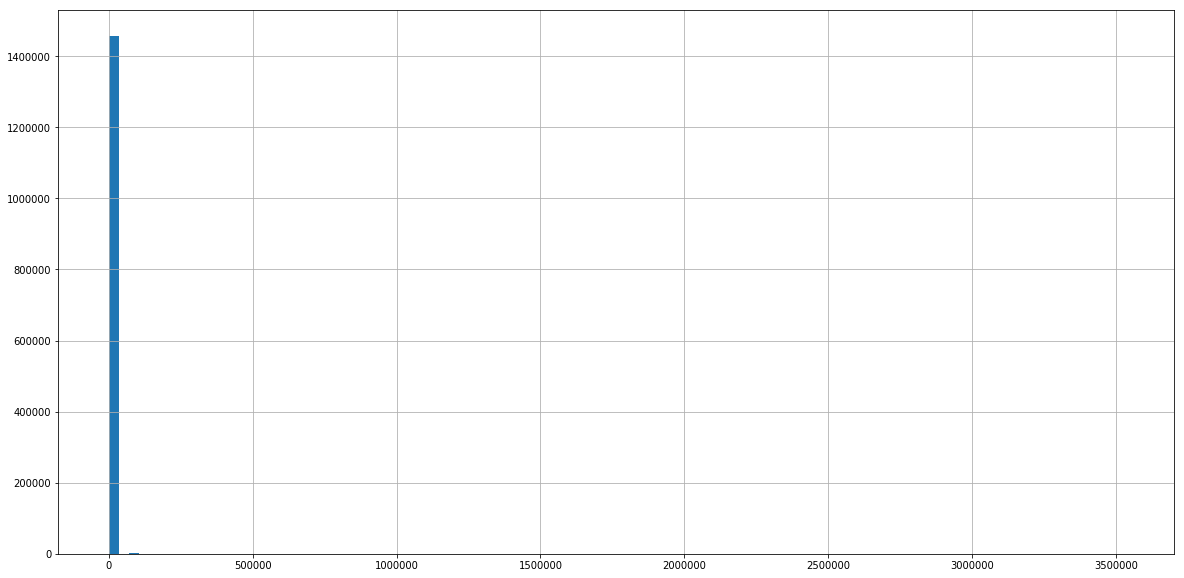

In [104]:
plt.figure(figsize=(20,10))
data['trip_duration'].hist(bins=100)

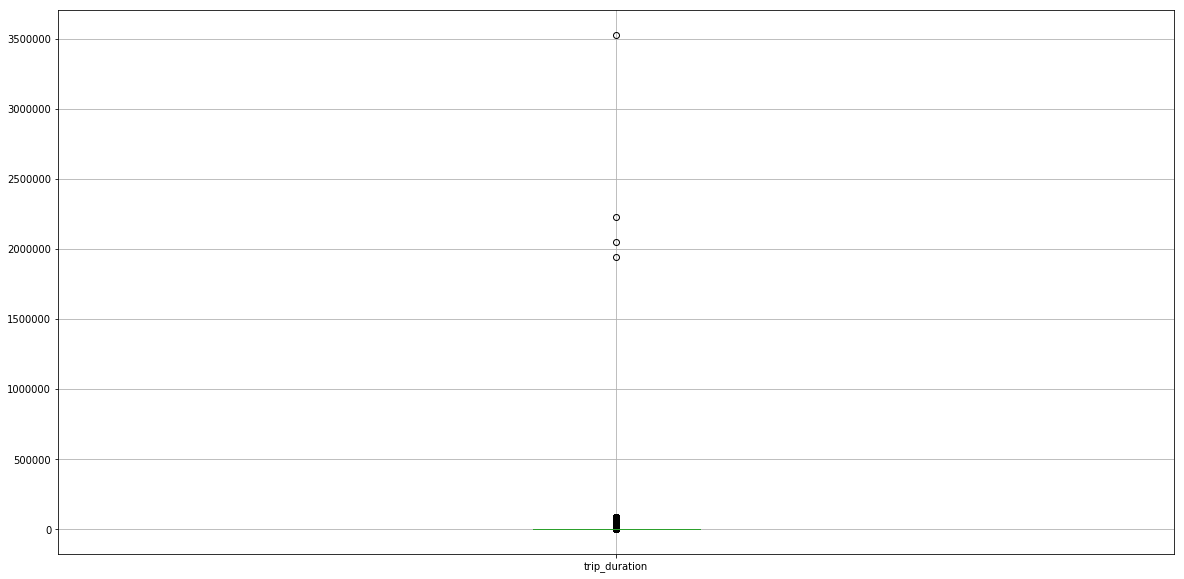

In [105]:
plt.figure(figsize=(20,10))
data.boxplot(column=['trip_duration'])

## ^^ Ben- I think it's important for the students to recognize there's a skew in the data, do you agree?

In [106]:
data= data[data.trip_duration<7500]

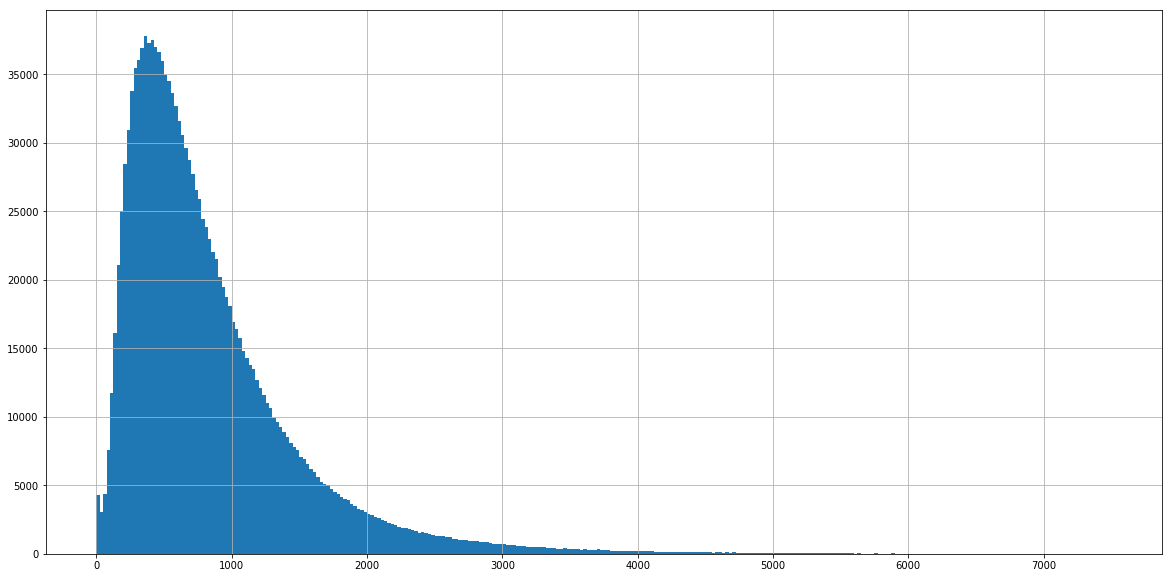

In [107]:
plt.figure(figsize=(20,10))
data['trip_duration'].hist(bins=300)

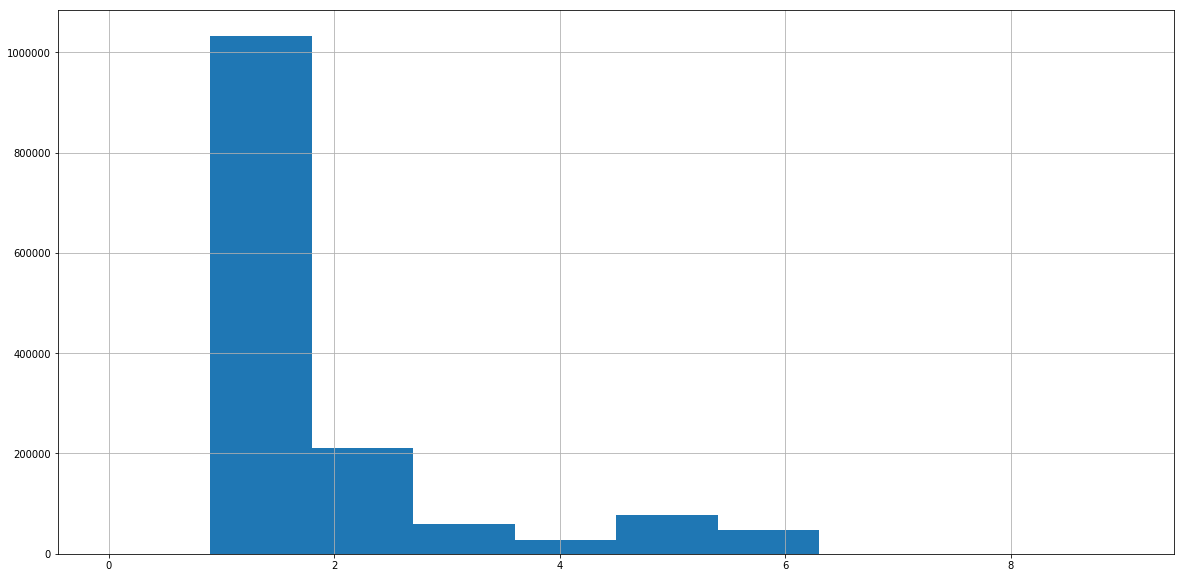

In [108]:

plt.figure(figsize=(20,10))
data['passenger_count'].hist(bins=10)

In [109]:
data.corr() 

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.287531,0.007737,0.001838,0.001474,0.004533,0.008744
passenger_count,0.287531,1.000000,0.002201,-0.005159,-0.000378,-0.002796,0.014991
pickup_longitude,0.007737,0.002201,1.000000,0.022565,0.784650,0.100405,0.193645
pickup_latitude,0.001838,-0.005159,0.022565,1.000000,0.115219,0.494532,-0.200216
dropoff_longitude,0.001474,-0.000378,0.784650,0.115219,1.000000,0.124835,0.113745
dropoff_latitude,0.004533,-0.002796,0.100405,0.494532,0.124835,1.000000,-0.161258
trip_duration,0.008744,0.014991,0.193645,-0.200216,0.113745,-0.161258,1.000000


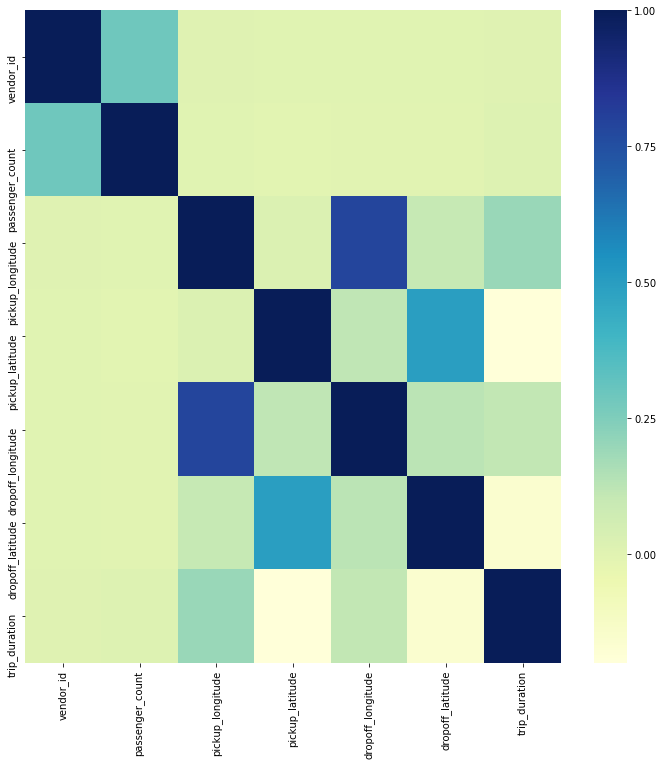

In [110]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), cmap="YlGnBu") 


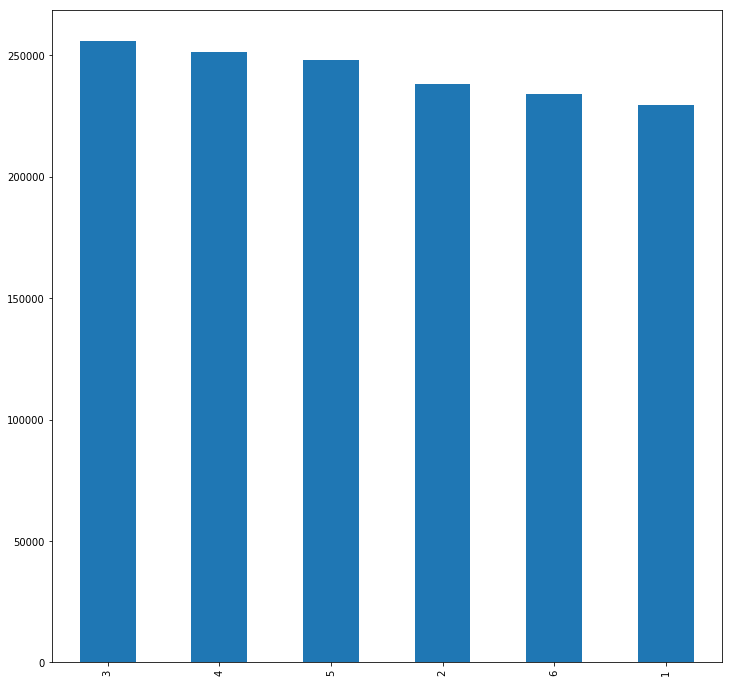

In [111]:
plt.figure(figsize=(12,12))
data['month'] = pd.DatetimeIndex(data['pickup_datetime']).month
data['month'].value_counts().plot.bar()

In [125]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'month'],
      dtype='object')

In [130]:
monthdf =  pd.get_dummies(data.month)
monthdf.rename(columns={"1": "Jan", "2": "Feb", "3": "Mar", "4": "Apr", "5": "May", "6": "Jun"})
df_month = (data[['trip_duration', 'passenger_count']]).join(monthdf)


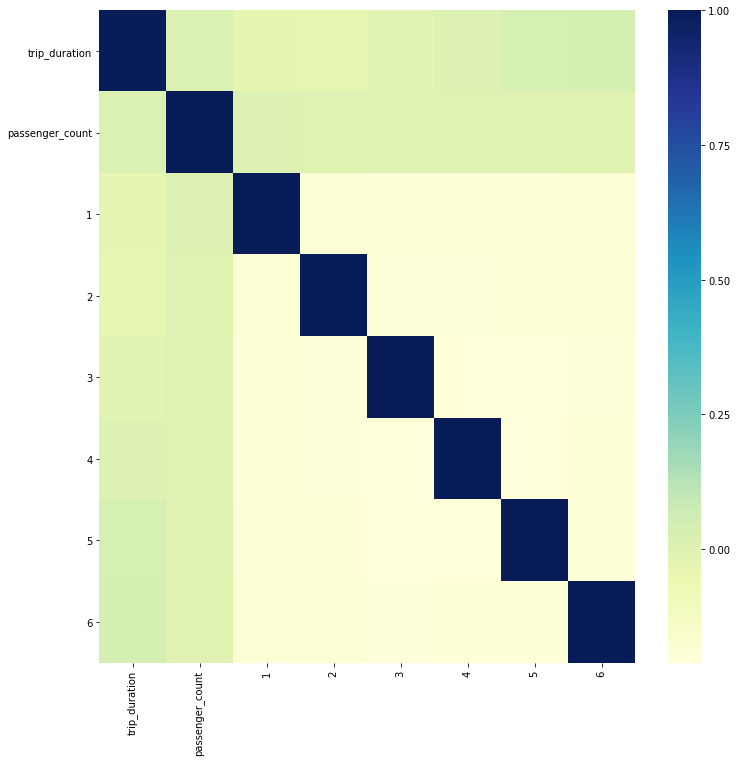

In [131]:
plt.figure(figsize=(12,12))
sns.heatmap(df_month.corr(), cmap="YlGnBu") 


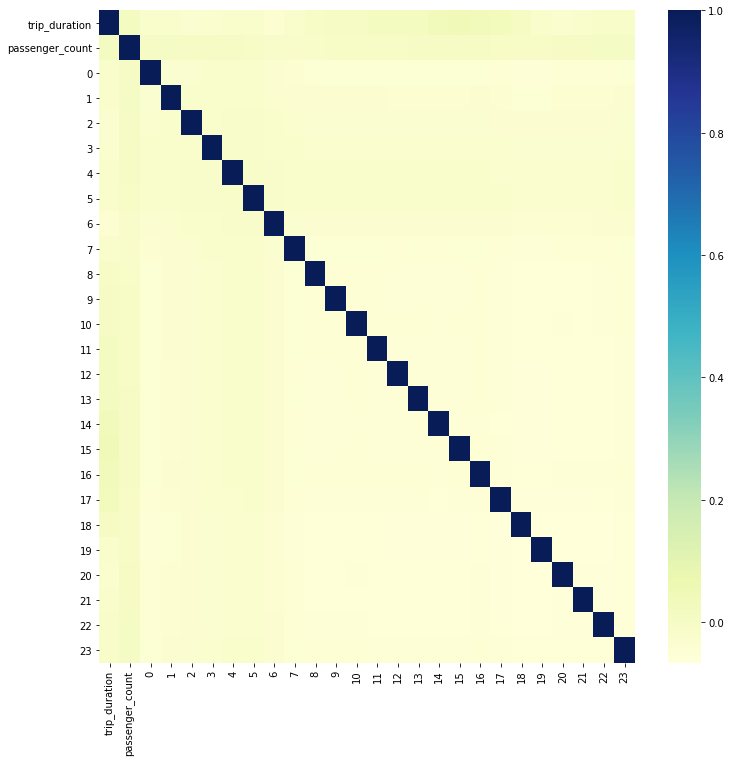

In [134]:
data['hour'] = data['pickup_datetime'].dt.hour
hour_df =  pd.get_dummies(data.hour)
hour_df = (data[['trip_duration', 'passenger_count']]).join(hour_df)
plt.figure(figsize=(12,12))
sns.heatmap(hour_df.corr(), cmap="YlGnBu") 




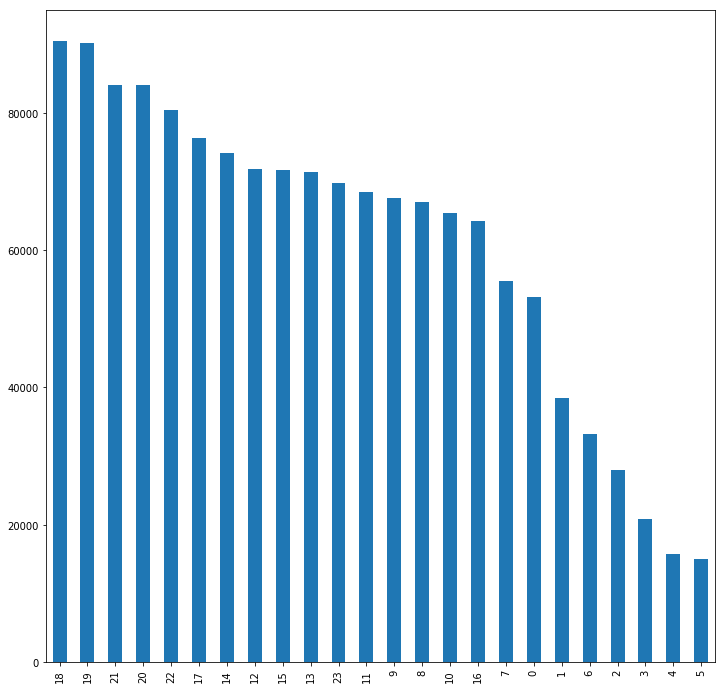

In [137]:
plt.figure(figsize=(12,12))
data['hour'].value_counts().plot.bar()

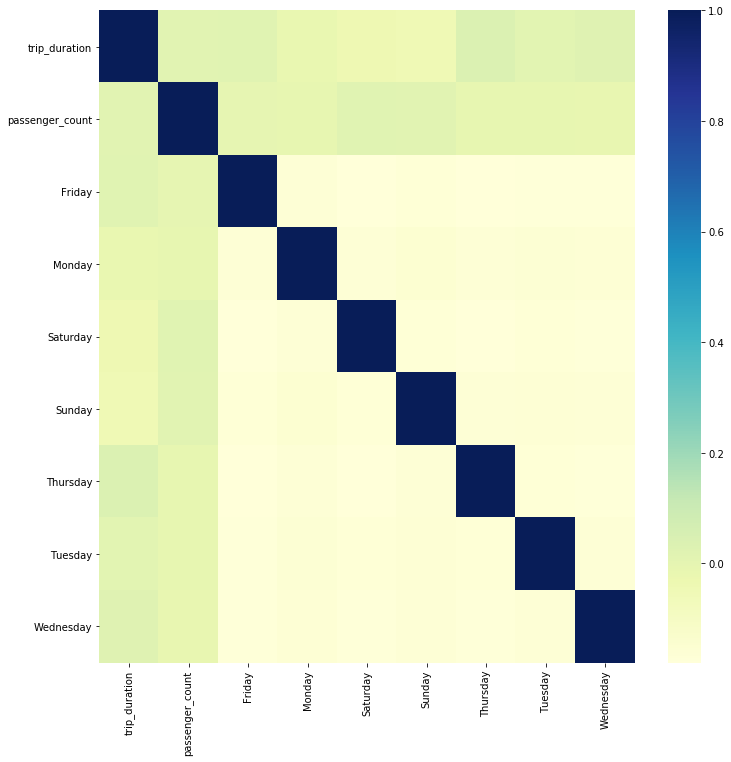

In [132]:
data['day_of_week'] = data['pickup_datetime'].dt.day_name()
day_of_weekdf =  pd.get_dummies(data.day_of_week)
day_of_weekdf = (data[['trip_duration', 'passenger_count']]).join(day_of_weekdf)
plt.figure(figsize=(12,12))
sns.heatmap(day_of_weekdf.corr(), cmap="YlGnBu") 



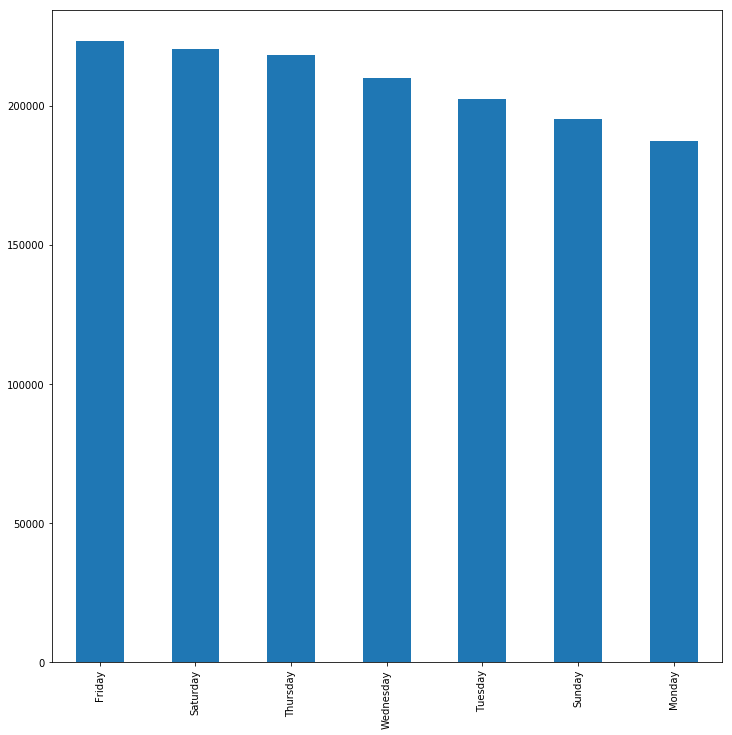

In [136]:
plt.figure(figsize=(12,12))
data['day_of_week'].value_counts().plot.bar()

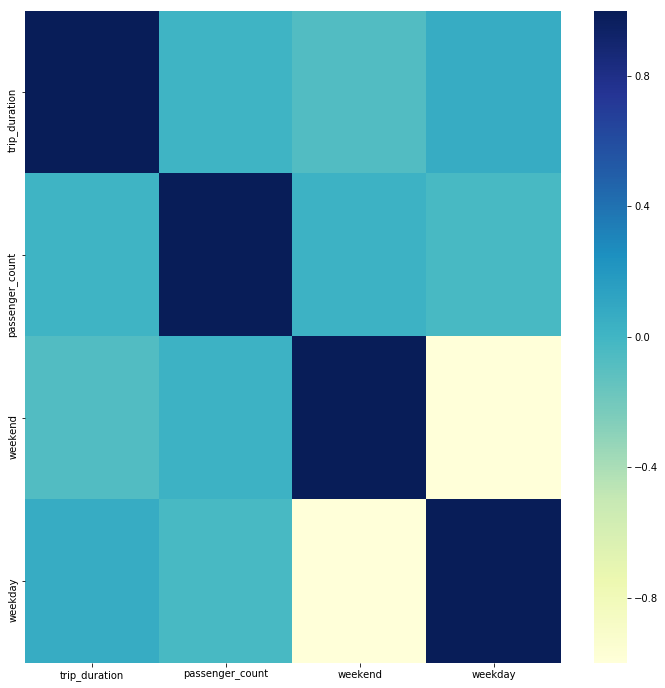

In [140]:
data['weekend'] = 0 
data.loc[data['day_of_week'] == 'Saturday', 'weekend'] = 1
data.loc[data['day_of_week'] == 'Sunday', 'weekend'] = 1
data['weekday'] = 0 
data.loc[data['day_of_week'] == 'Monday', 'weekday'] = 1
data.loc[data['day_of_week'] == 'Tuesday', 'weekday'] = 1
data.loc[data['day_of_week'] == 'Wednesday', 'weekday'] = 1
data.loc[data['day_of_week'] == 'Thursday', 'weekday'] = 1
data.loc[data['day_of_week'] == 'Friday', 'weekday'] = 1

weekend_df = (data[['trip_duration', 'passenger_count', 'weekend', 'weekday']])
plt.figure(figsize=(12,12))
sns.heatmap(weekend_df.corr(), cmap="YlGnBu") 



# Hypothesis Testing

In [ ]:
## Trip durations on weekends v weekdays

In [63]:
data[data.weekday== 1]['trip_duration'].mean(), data[data.weekday== 0]['trip_duration'].mean()

(861.5773394930691, 803.7561302142052)

In [65]:
from scipy.stats import ttest_ind
ttest_ind(data[data.weekday== 1]['trip_duration'], data[data.weekday== 0]['trip_duration'])

Ttest_indResult(statistic=52.91053243123607, pvalue=0.0)

In [ ]:
## passenger counts on weekends v weekdays

In [146]:
data[data.weekday==1]['passenger_count'].mean(), data[data.weekend==1]['passenger_count'].mean()

(1.6404004015543419, 1.7228962931049008)

In [148]:
from scipy.stats import ttest_ind
ttest_ind(data[data.weekday==1]['passenger_count'], data[data.weekday==0]['passenger_count'])

Ttest_indResult(statistic=-34.235875411281555, pvalue=8.961736209101004e-257)

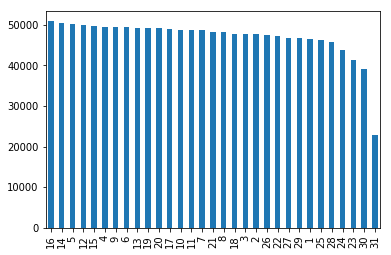

In [46]:
data['day'] = pd.DatetimeIndex(data['pickup_datetime']).day
data['day'].value_counts().plot.bar()

In [162]:
#season month holiday day_of_week workingday weather temp atemp humidity windspeed



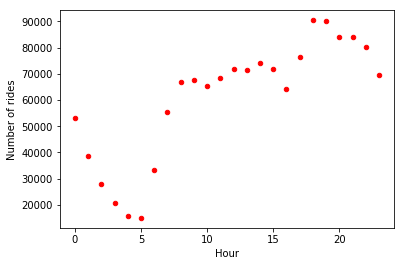

In [163]:
df = pd.DataFrame(data['hour'].value_counts()).reset_index().rename(columns={"index": "Hour", 'hour': 'Number of rides'})
df.plot(kind='scatter',x='Hour',y='Number of rides',color='red')
plt.show()

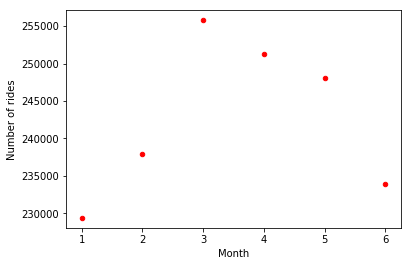

In [165]:
df = pd.DataFrame(data['month'].value_counts()).reset_index().rename(columns={"index": "Month", 'month': 'Number of rides'})
df.plot(kind='scatter',x='Month',y='Number of rides',color='red')
plt.show()

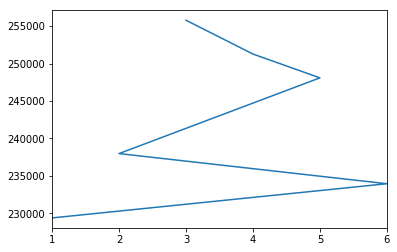

In [166]:
data.to_csv('Udacity_final.csv')